In [1]:
import pandas as pd
import re
import string
import pickle
import json


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YASH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
categories = ['rec.sport.baseball', 'sci.med', 'comp.graphics', 'talk.politics.mideast']
data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [6]:
df = pd.DataFrame({'text': data.data, 'label': data.target})
df['clean_text'] = df['text'].apply(clean_text)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

In [8]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [9]:
with open("model.pkl", "wb") as f:
    pickle.dump((tfidf, model), f)


In [10]:
with open("categories.json", "w") as f:
    json.dump(data.target_names, f)


In [11]:
print("✅ Model and vectorizer saved!")

✅ Model and vectorizer saved!


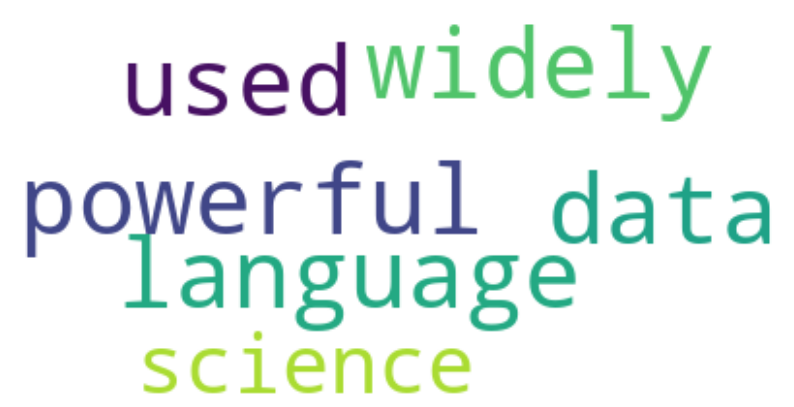

In [12]:
# Word Cloud
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)  # Define stopwords
stopwords.update(["Python", "is"])

# Replace `text` with your own input text
text = "Python is a powerful language. Python is widely used in data science."

# Generate word cloud with custom parameters
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_font_size=50,
    max_words=100
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



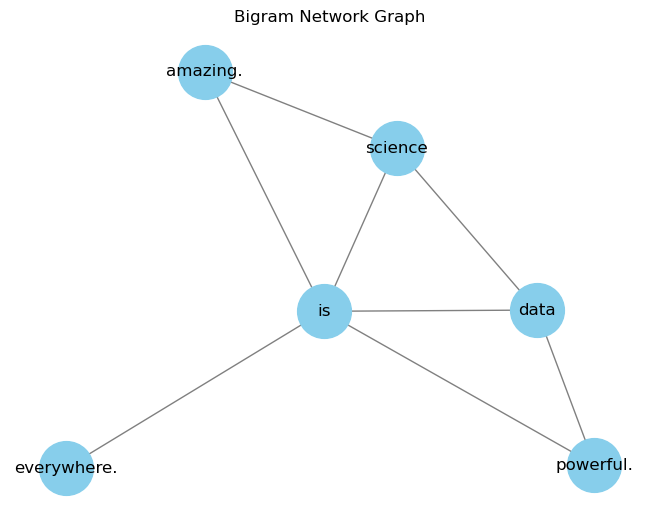

In [13]:
# Bigram Network Graph
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

text = "Data science is amazing. Science is powerful. Data is everywhere."
words = text.lower().split()
bigrams = list(zip(words[:-1], words[1:]))
bigram_counts = Counter(bigrams)

G = nx.Graph()

for (w1, w2), count in bigram_counts.items():
    G.add_edge(w1, w2, weight=count)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray')
plt.title("Bigram Network Graph")
plt.show()
